In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df=pd.read_csv('F:/DS/craigslist-used car raw data/vehicles.csv')

In [4]:
df.shape

(509577, 25)

In [5]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [6]:
#drop the columns I don't need
drop_columns=['id','url','region','region_url','cylinders','type','image_url','county','state','lat','long','vin','description','paint_color','size']

In [7]:
df=df.drop(columns=drop_columns)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 10 columns):
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
drive           365434 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 38.9+ MB


In [37]:
columns_label=['Prices','Year','Manufacturer','Model','Condition','Fuel','Meter','Status','Transmission','Drive']
df.columns=columns_label

In [38]:
df.head(5)

,Prices,Year,Manufacturer,Model,Condition,Fuel,Meter,Status,Transmission,Drive
0,17899,2012.0,volkswagen,golf r,excellent,gas,63500.0,clean,manual,4wd
1,0,2016.0,ford,f-150,excellent,gas,10.0,clean,automatic,4wd
2,46463,2015.0,gmc,sierra 1500,excellent,gas,7554.0,clean,automatic,4wd
3,0,2016.0,ford,f-150,excellent,gas,10.0,clean,automatic,4wd
4,49999,2018.0,ford,f-450,NaN,diesel,70150.0,clean,automatic,4wd


In [39]:
#Calculate missing data of each column
df.isnull().sum()

Prices               0
Year                 0
Manufacturer     22764
Model             7989
Condition       231934
Fuel              3985
Meter            92324
Status            3062
Transmission      3719
Drive           144143
dtype: int64

In [42]:
#check the dtype of 'Year'
print(df['Year'].dtypes)

float64


In [47]:
#fill missing data of 'Year'
df['Year'].fillna(0, inplace=True)

In [95]:
#drop the ones year=1990
df = df[df['Year']>=1990]

In [96]:
#astype 'Year' into int32
df['Year']= df['Year'].astype('int32')

In [97]:
#fill missing data of 'Manufacturer'
df['Manufacturer'].fillna('unkonw',inplace=True)

In [98]:
#fill missing data of 'Manufacturer'
df['Manufacturer'].fillna('unkonw',inplace=True)

In [99]:
#check the dtype of 'Model'
print(df['Model'].dtypes)

object


In [100]:
#fill missing data of 'Model'
df['Model'].fillna('unkonw',inplace=True)

In [101]:
#fill missing data of 'Condition'
df['Condition'].fillna('unkonw',inplace=True)

In [102]:
#fill missing data of 'Condition'
df['Condition'].fillna('unkonw',inplace=True)

In [103]:
#fill missing data of 'Fuel'
df['Fuel'].fillna('unkonw',inplace=True)

In [104]:
#check the dtype of 'Meter'
print(df['Meter'].dtypes)

float64


In [105]:
#fill missing data of 'Meter'
df['Meter'].fillna(0,inplace=True)

In [121]:
#drop the ones meter=0
df=df[df['Meter']>0]

In [122]:
#fill missing data of 'Status'
df['Status'].fillna('unkonw',inplace=True)

In [123]:
#fill missing data of 'Transmission'
df['Transmission'].fillna('unkonw',inplace=True)

In [124]:
#fill missing data of 'Drive'
df['Drive'].fillna('unkonw',inplace=True)

In [125]:
#Calculate missing data of each column
df.isnull().sum()

Prices          0
Year            0
Manufacturer    0
Model           0
Condition       0
Fuel            0
Meter           0
Status          0
Transmission    0
Drive           0
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408090 entries, 0 to 509576
Data columns (total 10 columns):
Prices          408090 non-null int64
Year            408090 non-null int32
Manufacturer    408090 non-null object
Model           408090 non-null object
Condition       408090 non-null object
Fuel            408090 non-null object
Meter           408090 non-null float64
Status          408090 non-null object
Transmission    408090 non-null object
Drive           408090 non-null object
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 32.7+ MB


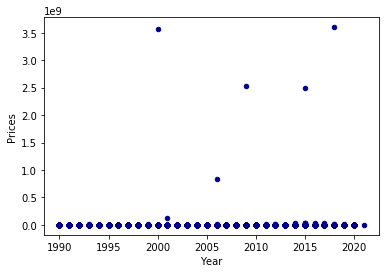

In [127]:
df.plot.scatter(x='Year',y='Prices',
                      c='DarkBlue')

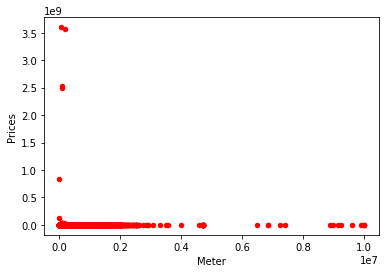

In [128]:
df.plot.scatter(x='Meter',y='Prices',
                      c='Red')